# Transforming Data into Features

I am a data scientist at a clothing company and are working with a data set of customer reviews. This dataset is originally from [Kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews) and has a lot of potential for various machine learning purposes. I am tasked with transforming some of these features to make the data more useful for analysis. To do this,
* Transforming categorical data
* Scaling your data
* Working with date-time features

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [67]:
# Import Data

reviews = pd.read_csv("data/Womens Clothing E-Commerce Reviews.csv")

#Drop the Unnamed: 0 axis from the dataframe
reviews.drop("Unnamed: 0", axis=1, inplace = True)
reviews.head(2)

#print column names 
reviews.columns

# Fix the column names 
reviews.columns = ["clothing_id", "age", "title", "review_text", "rating",
                  "recommended", "positive_feedback", "division_name", 
                  "department_name", "class_name"]

#print info
reviews.info()

# Look at the counts of recommended
print(reviews["recommended"].value_counts())

#Look at the counts of rating
reviews["rating"]

reviews["department_name"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clothing_id        23486 non-null  int64 
 1   age                23486 non-null  int64 
 2   title              19676 non-null  object
 3   review_text        22641 non-null  object
 4   rating             23486 non-null  int64 
 5   recommended        23486 non-null  int64 
 6   positive_feedback  23486 non-null  int64 
 7   division_name      23472 non-null  object
 8   department_name    23472 non-null  object
 9   class_name         23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB
1    19314
0     4172
Name: recommended, dtype: int64


Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: department_name, dtype: int64

In [68]:
# Perform One-hot encoding on the department_name column

one_hot = pd.get_dummies(reviews["department_name"])

# Join the result backt to our orgincal data frame
reviews = reviews.join(one_hot)
reviews.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'rating', 'recommended',
       'positive_feedback', 'division_name', 'department_name', 'class_name',
       'Bottoms', 'Dresses', 'Intimate', 'Jackets', 'Tops', 'Trend'],
      dtype='object')

In [69]:
reviews.head()

,clothing_id,age,title,review_text,rating,recommended,positive_feedback,division_name,department_name,class_name,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0,0,1,0,0,0
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0,1,0,0,0,0
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0,1,0,0,0,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1,0,0,0,0,0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0,0,0,0,1,0


In [74]:
# Set index to clothing_id


reviews["Jackets"].describe()

count    23486.000000
mean         0.043941
std          0.204968
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Jackets, dtype: float64

# Filter Methods

In [101]:
df = pd.DataFrame(data={
    'edu_goal': ['bachelors', 'bachelors', 'bachelors', 'masters', 'masters', 'masters', 'masters', 'phd', 'phd', 'phd'],
    'hours_study': [1, 2, 3, 3, 3, 4, 3, 4, 5, 5],
    'hours_TV': [4, 3, 4, 3, 2, 3, 2, 2, 1, 1],
    'hours_sleep': [10, 10, 8, 8, 6, 6, 8, 8, 10, 10],
    'height_cm': [155, 151, 160, 160, 156, 150, 164, 151, 158, 152],
    'grade_level': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'exam_score': [71, 72, 78, 79, 85, 86, 92, 93, 99, 100]
})
 

In [109]:
df

,edu_goal,hours_study,hours_TV,hours_sleep,height_cm,grade_level,exam_score
0,bachelors,1,4,10,155,8,71
1,bachelors,2,3,10,151,8,72
2,bachelors,3,4,8,160,8,78
3,masters,3,3,8,160,8,79
4,masters,3,2,6,156,8,85
5,masters,4,3,6,150,8,86
6,masters,3,2,8,164,8,92
7,phd,4,2,8,151,8,93
8,phd,5,1,10,158,8,99
9,phd,5,1,10,152,8,100


Our goal is to use the data to predict how well each student will perform on the exam. Thus, our target variable is exam_score and the remaining 6 variables are our features. We’ll prepare the data by separating the features matrix (X) and the target vector (y):

In [117]:
X = df.drop(columns=["exam_score"])
y = df["exam_score"]

# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]

**Variance Threshold**
This is because features with low variance do not contribute much information to a model. Since variance can only be calculated on numeric values, this method only works on quantitative features. 

In [118]:
X_num = X.drop(columns=['edu_goal'])
 
X_num

,hours_study,hours_TV,hours_sleep,height_cm,grade_level
0,1,4,10,155,8
1,2,3,10,151,8
2,3,4,8,160,8
3,3,3,8,160,8
4,3,2,6,156,8
5,4,3,6,150,8
6,3,2,8,164,8
7,4,2,8,151,8
8,5,1,10,158,8
9,5,1,10,152,8


In [119]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)
selector.fit_transform(X_num)

array([[  1,   4,  10, 155],
       [  2,   3,  10, 151],
       [  3,   4,   8, 160],
       [  3,   3,   8, 160],
       [  3,   2,   6, 156],
       [  4,   3,   6, 150],
       [  3,   2,   8, 164],
       [  4,   2,   8, 151],
       [  5,   1,  10, 158],
       [  5,   1,  10, 152]])

By default, it drops all features with zero variance, but we can adjust the threshold during class instantiation using the threshold parameter if we want to allow some variation. The .fit_transform() method returns the filtered features as a numpy array:

In [122]:
#Specify `indices=True` to get indices of selected features
selector.get_support(indices=True)

array([0, 1, 2, 3])

In [121]:
# Use indices to get the corresponding column names of selected features
num_cols = list(X_num.columns[selector.get_support(indices=True)])
num_cols

['hours_study', 'hours_TV', 'hours_sleep', 'height_cm']

In [126]:
X_num = X_num[num_cols]
X_num

,hours_study,hours_TV,hours_sleep,height_cm
0,1,4,10,155
1,2,3,10,151
2,3,4,8,160
3,3,3,8,160
4,3,2,6,156
5,4,3,6,150
6,3,2,8,164
7,4,2,8,151
8,5,1,10,158
9,5,1,10,152


In [128]:
# Finally, to obtain our entire features Dataframe, include the cat column

X= X[["edu_goal"] + num_cols]
X

,edu_goal,hours_study,hours_TV,hours_sleep,height_cm
0,bachelors,1,4,10,155
1,bachelors,2,3,10,151
2,bachelors,3,4,8,160
3,masters,3,3,8,160
4,masters,3,2,6,156
5,masters,4,3,6,150
6,masters,3,2,8,164
7,phd,4,2,8,151
8,phd,5,1,10,158
9,phd,5,1,10,152


### Pearson’s correlation
Another type of filter method involves finding the correlation between variables. In particular, the Pearson’s correlation coefficient is useful for measuring the linear relationship between two numeric, continuous variables — a coefficient close to 1 represents a positive correlation, -1 represents a negative correlation, and 0 represents no correlation. Like variance, Pearson’s correlation coefficient cannot be calculated for categorical variables. Although, there is a related point biserial correlation coefficient that can be computed when one variable is dichotomous, but we won’t focus on that here.

##### Correlation between features
To determine which variables are correlated with one another, we can use the `.corr()` method from `pandas` to find the correlation coefficient between each pair of numeric features in a DataFrame. By default, `.corr()` computes the Pearson’s correlation coefficient, but alternative methods can be specified using the method parameter. We can visualize the resulting correlation matrix using a heatmap:



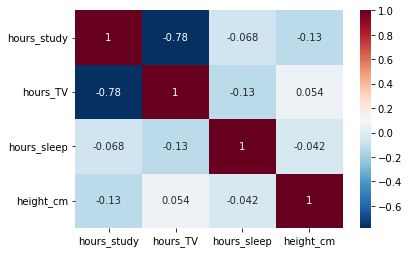

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_num.corr(method="pearson")

sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r");


Lets define high correlation as having a coefficient of greater an 0.7 oe less than -0.7

In [147]:
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], 
                  corr_matrix.iloc[i,j])


#### Correlation between feature and target

As mentioned, the second way correlation can be used is to determine if there is a relationship between a feature and the target variable. In the case of Pearson’s correlation, this is especially useful if we intend to fit a linear model, which assumes a linear relationship between the target and predictor variables. If a feature is not very correlated with the target variable, such as having a coefficient of between -0.3 and 0.3, then it may not be very predictive and can potentially be filtered out.

In [150]:
X_y = X_num.copy()
X_y["exam_score"] = y
X_y

,hours_study,hours_TV,hours_sleep,height_cm,exam_score
0,1,4,10,155,71
1,2,3,10,151,72
2,3,4,8,160,78
3,3,3,8,160,79
4,3,2,6,156,85
5,4,3,6,150,86
6,3,2,8,164,92
7,4,2,8,151,93
8,5,1,10,158,99
9,5,1,10,152,100


In [151]:
corr_matrix = X_y.corr(method="pearson")

# Isolate the column corresponding to exam_score
corr_target = corr_matrix[["exam_score"]].drop(labels=["exam_score"])
corr_target

,exam_score
hours_study,9.048441e-01
hours_TV,-9.008659e-01
hours_sleep,1.197402e-16
height_cm,1.458693e-02


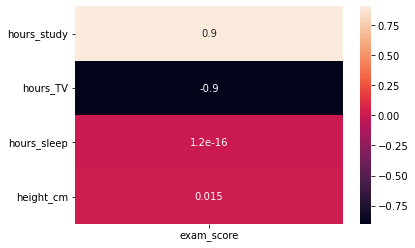

In [161]:
sns.heatmap(corr_target, annot=True, fmt=".2");

 Since `hours_study` has a strong correlation with the target variable, let's remove `hours_TV` as the redundant feature

In [163]:
X = X.drop(columns=["hours_TV"])
X

,edu_goal,hours_study,hours_sleep,height_cm
0,bachelors,1,10,155
1,bachelors,2,10,151
2,bachelors,3,8,160
3,masters,3,8,160
4,masters,3,6,156
5,masters,4,6,150
6,masters,3,8,164
7,phd,4,8,151
8,phd,5,10,158
9,phd,5,10,152


#### Mutual information

In [165]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_enc = X.copy()
X_enc["edu_goal"] = le.fit_transform(X["edu_goal"])
X_enc

,edu_goal,hours_study,hours_sleep,height_cm
0,0,1,10,155
1,0,2,10,151
2,0,3,8,160
3,1,3,8,160
4,1,3,6,156
5,1,4,6,150
6,1,3,8,164
7,2,4,8,151
8,2,5,10,158
9,2,5,10,152


In [169]:
from sklearn.feature_selection import mutual_info_regression

mutual_info_regression(X_enc, y, discrete_features=[0], random_state=68)

array([0.75563492, 0.38896825, 0.18563492, 0.        ])

The values shows that `height_cm` have no correlation with the target variable hence should be dropped

### SelectKBest Clsss

In [172]:
from functools import partial
from sklearn.feature_selection import SelectKBest
 
score_func = partial(mutual_info_regression, 
                     discrete_features=[0], random_state=68)
 
# Select top 3 features with the most mutual information
selection = SelectKBest(score_func=score_func, k=3)
 
print(selection.fit_transform(X_enc, y))

[[ 0  1 10]
 [ 0  2 10]
 [ 0  3  8]
 [ 1  3  8]
 [ 1  3  6]
 [ 1  4  6]
 [ 1  3  8]
 [ 2  4  8]
 [ 2  5 10]
 [ 2  5 10]]


As seen above, we selected the top 3 features based on mutual information, thus dropping height_cm. Like VarianceThreshold, SelectKBest also offers the .get_support() method that returns the indices of the selected features, so we could subset our original features DataFrame:



In [174]:
X = X[X.columns[selection.get_support(indices=True)]]
X

,edu_goal,hours_study,hours_sleep
0,bachelors,1,10
1,bachelors,2,10
2,bachelors,3,8
3,masters,3,8
4,masters,3,6
5,masters,4,6
6,masters,3,8
7,phd,4,8
8,phd,5,10
9,phd,5,10
